# ADF Evaluation


In [13]:
%load_ext dotenv
%reload_ext dotenv
%dotenv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style
sns.set_style("whitegrid")

# Load the ADF test results
data_path = os.getenv('DATA_PATH')
adf_df = pd.read_csv(os.path.join(data_path, 'adf_test_results.csv'))

print(f"Loaded {len(adf_df)} ADF test results ")
adf_df.head()


The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv
Loaded 1120 ADF test results 


,Series,ADF Statistic,p-value,Lags Used,Observations,Critical Value (1%),Critical Value (5%),Critical Value (10%),Stationary (5%)
0,Item 19703 - buy_quantity,-3.715119,3.905447e-03,18,30887,-3.430562,-2.861634,-2.56682,Yes
1,Item 19703 - buy_unit_price,-6.653207,5.059604e-09,46,30859,-3.430562,-2.861634,-2.56682,Yes
2,Item 19703 - sell_quantity,-3.900291,2.032707e-03,51,30854,-3.430562,-2.861634,-2.56682,Yes
3,Item 19703 - sell_unit_price,-10.793439,2.104589e-19,47,30858,-3.430562,-2.861634,-2.56682,Yes
4,Item 102255 - buy_quantity,-0.834664,8.087272e-01,36,30914,-3.430562,-2.861633,-2.56682,No


# ADF Stationarity Test Results

This notebook presents the findings from Augmented Dickey-Fuller (ADF) tests performed on time series data.

## What is the ADF Test?

The ADF test determines whether a time series is **stationary** or **non-stationary**:
- **Stationary**: Mean and variance are constant over time (good for forecasting)
- **Non-stationary**: Has trends, seasonality, or changing variance (needs transformation)

## Interpretation

- **p-value < 0.05**: Series is stationary (we can use it directly for modeling)
- **p-value ≥ 0.05**: Series is non-stationary (needs differencing or detrending)


In [14]:
# Summary Statistics
print("=" * 80)
print("ADF TEST SUMMARY STATISTICS")
print("=" * 80)
print(f"\nTotal series tested: {len(adf_df)}")
print(f"Stationary series (5% level): {(adf_df['Stationary (5%)'] == 'Yes').sum()} ({(adf_df['Stationary (5%)'] == 'Yes').sum() / len(adf_df) * 100:.2f}%)")
print(f"Non-stationary series (5% level): {(adf_df['Stationary (5%)'] == 'No').sum()} ({(adf_df['Stationary (5%)'] == 'No').sum() / len(adf_df) * 100:.2f}%)")

print("\n" + "-" * 80)
print("P-VALUE STATISTICS")
print("-" * 80)
print(f"Mean p-value: {adf_df['p-value'].mean():.4f}")
print(f"Median p-value: {adf_df['p-value'].median():.4f}")
print(f"Min p-value: {adf_df['p-value'].min():.4f}")
print(f"Max p-value: {adf_df['p-value'].max():.4f}")


ADF TEST SUMMARY STATISTICS

Total series tested: 1120
Stationary series (5% level): 579 (51.70%)
Non-stationary series (5% level): 541 (48.30%)

--------------------------------------------------------------------------------
P-VALUE STATISTICS
--------------------------------------------------------------------------------
Mean p-value: 0.2360
Median p-value: 0.0418
Min p-value: 0.0000
Max p-value: 1.0000


## Visualization 1: Stationarity Distribution

This shows the overall breakdown of stationary vs non-stationary series.


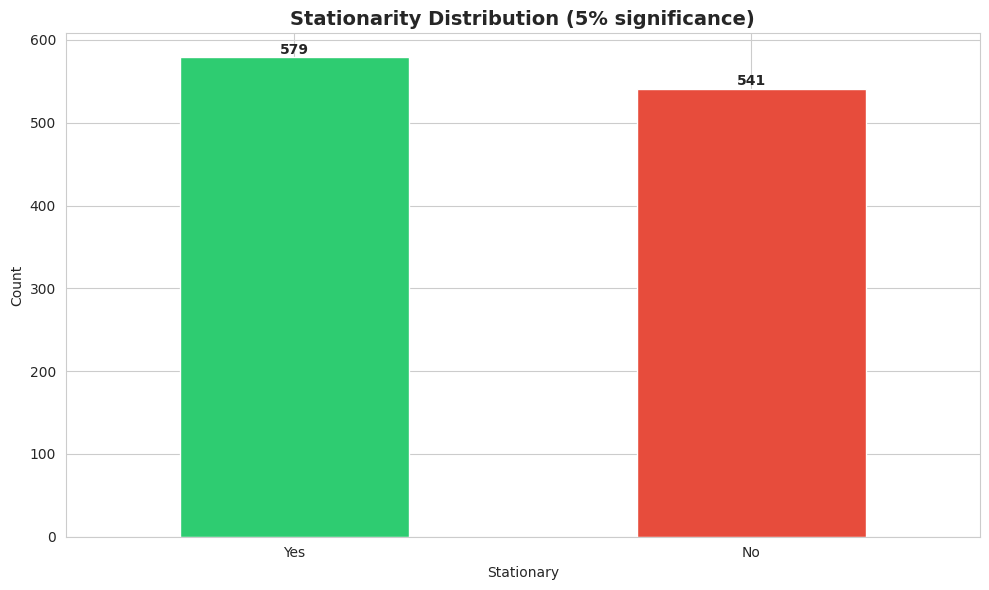

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

stationary_counts = adf_df['Stationary (5%)'].value_counts()
colors = ['#2ecc71' if x == 'Yes' else '#e74c3c' for x in stationary_counts.index]
stationary_counts.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Stationarity Distribution (5% significance)', fontsize=14, fontweight='bold')
ax.set_xlabel('Stationary')
ax.set_ylabel('Count')
ax.tick_params(rotation=0)
for i, v in enumerate(stationary_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Visualization 2: P-value Distribution

The p-value distribution shows how confident we are in our stationarity assessments.
Values below the red line (0.05) indicate stationary series.


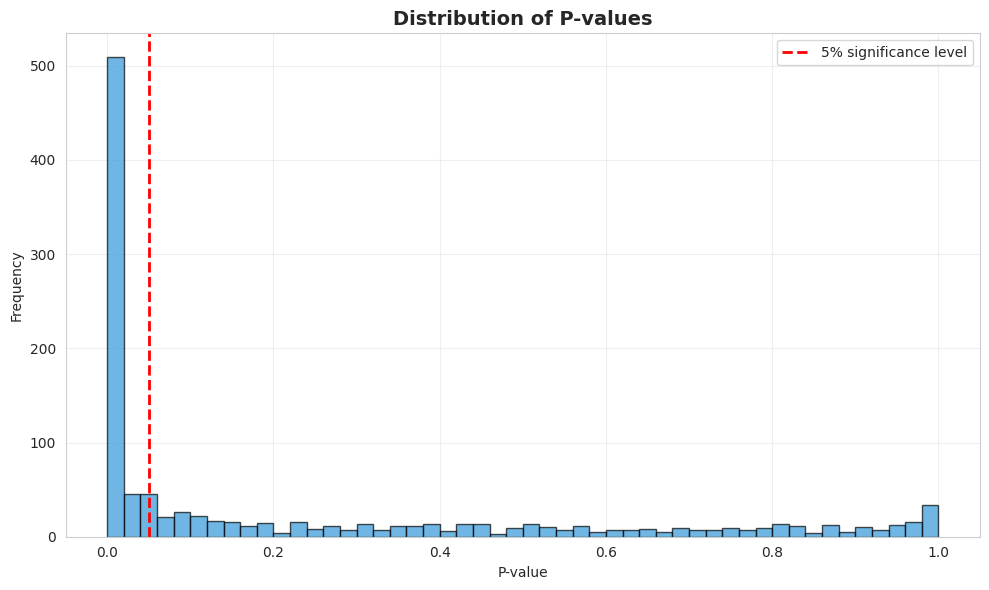

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(adf_df['p-value'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
ax.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='5% significance level')
ax.set_title('Distribution of P-values', fontsize=14, fontweight='bold')
ax.set_xlabel('P-value')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Visualization 3: ADF Statistic vs Critical Value

This scatter plot compares the test statistic to the critical value.
For a series to be stationary, the ADF statistic should be MORE NEGATIVE than the critical value.


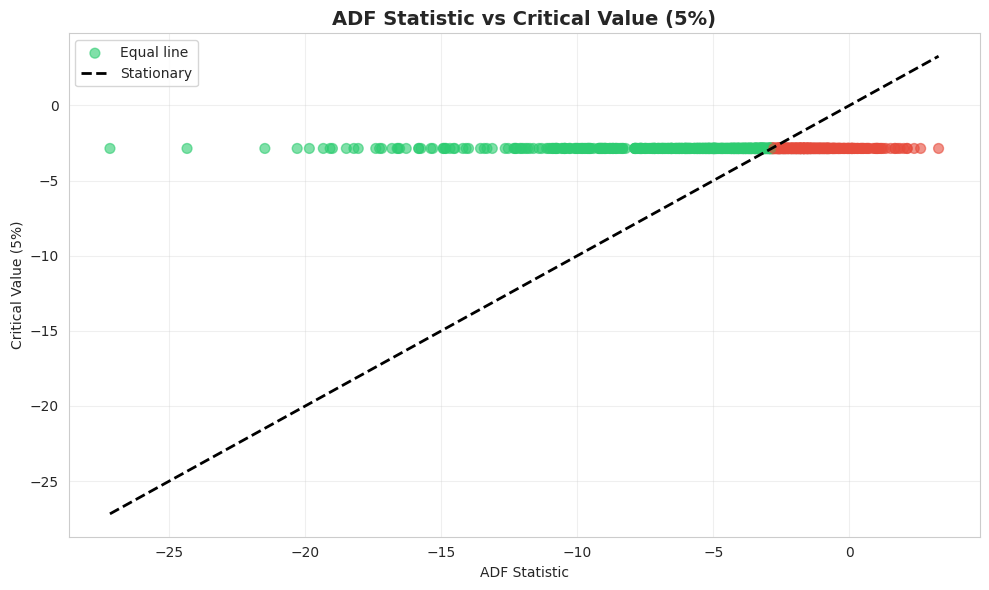

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(adf_df['ADF Statistic'], adf_df['Critical Value (5%)'],
           c=adf_df['Stationary (5%)'].map({'Yes': '#2ecc71', 'No': '#e74c3c'}),
           alpha=0.6, s=50)
ax.plot([adf_df['ADF Statistic'].min(), adf_df['ADF Statistic'].max()],
         [adf_df['ADF Statistic'].min(), adf_df['ADF Statistic'].max()],
         'k--', linewidth=2, label='Equal line')
ax.set_title('ADF Statistic vs Critical Value (5%)', fontsize=14, fontweight='bold')
ax.set_xlabel('ADF Statistic')
ax.set_ylabel('Critical Value (5%)')
ax.legend(['Equal line', 'Stationary', 'Non-stationary'])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Visualization 4: Stationarity by Series Type

Breaking down stationarity by the type of time series (e.g., buy quantity, sell quantity, prices).


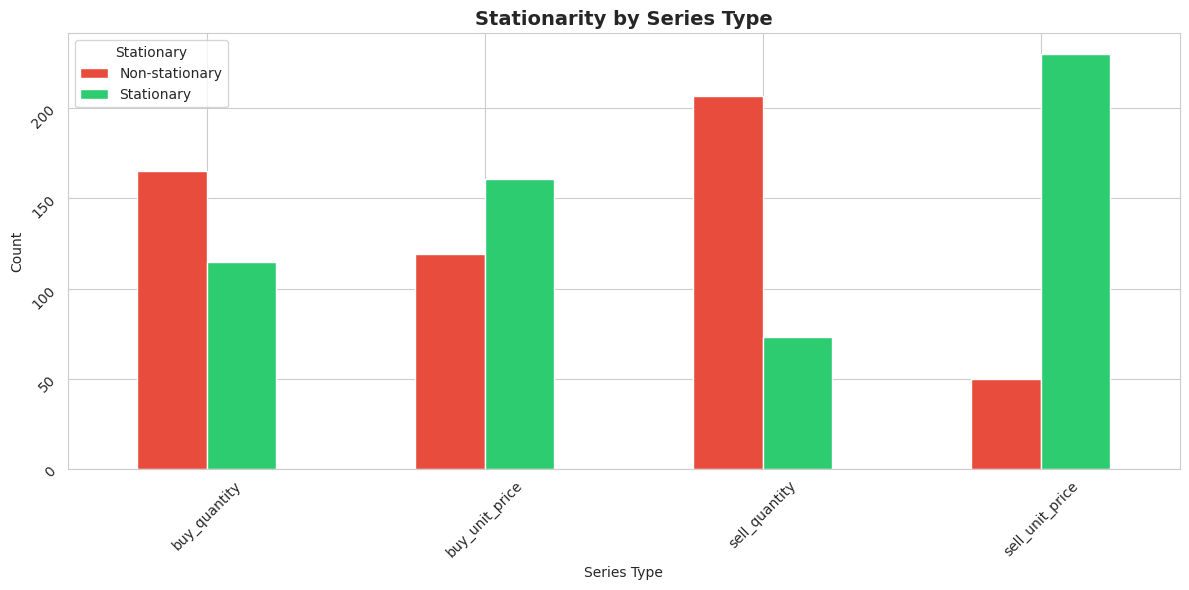

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

series_types = adf_df['Series'].str.extract(r'- (.+)$')[0]
stationarity_by_type = pd.crosstab(series_types, adf_df['Stationary (5%)'])
stationarity_by_type.plot(kind='bar', ax=ax, color=['#e74c3c', '#2ecc71'], stacked=False)
ax.set_title('Stationarity by Series Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Series Type')
ax.set_ylabel('Count')
ax.tick_params(rotation=45)
ax.legend(title='Stationary', labels=['Non-stationary', 'Stationary'])

plt.tight_layout()
plt.show()

## Detailed Breakdown by Series Type


In [19]:
series_types = adf_df['Series'].str.extract(r'- (.+)$')[0]
series_types_summary = pd.crosstab(series_types, adf_df['Stationary (5%)'], margins=True)
print(series_types_summary)


Stationary (5%)   No  Yes   All
0                              
buy_quantity     165  115   280
buy_unit_price   119  161   280
sell_quantity    207   73   280
sell_unit_price   50  230   280
All              541  579  1120


## Most Stationary Series

These series have the strongest evidence of stationarity (lowest p-values).


In [20]:
print("TOP 10 MOST STATIONARY SERIES")
print("-" * 80)
top_stationary = adf_df.nsmallest(10, 'p-value')[['Series', 'ADF Statistic', 'p-value', 'Stationary (5%)']]
display(top_stationary)


TOP 10 MOST STATIONARY SERIES
--------------------------------------------------------------------------------


,Series,ADF Statistic,p-value,Stationary (5%)
59,Item 19750 - sell_unit_price,-24.346668,0.000000e+00,Yes
64,Item 38135 - buy_quantity,-20.298098,0.000000e+00,Yes
389,Item 46747 - buy_unit_price,-19.851050,0.000000e+00,Yes
524,Item 38449 - buy_quantity,-19.003302,0.000000e+00,Yes
575,Item 77604 - sell_unit_price,-19.086712,0.000000e+00,Yes
639,Item 77648 - sell_unit_price,-19.337711,0.000000e+00,Yes
667,Item 19924 - sell_unit_price,-27.179889,0.000000e+00,Yes
1023,Item 19789 - sell_unit_price,-21.485816,0.000000e+00,Yes
185,Item 38128 - buy_unit_price,-18.490743,2.126980e-30,Yes
179,Item 12255 - sell_unit_price,-18.213996,2.388850e-30,Yes


## Least Stationary Series

These series show strong evidence of non-stationarity (highest p-values) and will need transformation.


In [21]:
print("TOP 10 LEAST STATIONARY SERIES")
print("-" * 80)
least_stationary = adf_df.nlargest(10, 'p-value')[['Series', 'ADF Statistic', 'p-value', 'Stationary (5%)']]
display(least_stationary)

TOP 10 LEAST STATIONARY SERIES
--------------------------------------------------------------------------------


,Series,ADF Statistic,p-value,Stationary (5%)
374,Item 36041 - sell_quantity,3.277316,1.000000,No
994,Item 19748 - sell_quantity,2.618038,0.999078,No
746,Item 43319 - sell_quantity,2.382082,0.999002,No
995,Item 19748 - sell_unit_price,2.128217,0.998818,No
394,Item 19682 - sell_quantity,2.117505,0.998807,No
26,Item 36038 - sell_quantity,1.999074,0.998672,No
218,Item 12177 - sell_quantity,1.860763,0.998462,No
10,Item 75270 - sell_quantity,1.777773,0.998304,No
818,Item 24335 - sell_quantity,1.676130,0.998069,No
392,Item 19682 - buy_quantity,1.672353,0.998059,No


## Key Findings & Recommendations

Based on the ADF test results:

1. **Stationary Series**: Can be used directly for forecasting models (Armima, VAR, etc.)
2. **Non-stationary Series**: Should be differenced or detrended before modeling
3. **Next Steps**:
   - Apply first-order differencing to non-stationary series
   - Re-run ADF tests on differenced data
   - Consider seasonal differencing if patterns exist


In [22]:
findings = {
    'total_series': len(adf_df),
    'stationary_count': (adf_df['Stationary (5%)'] == 'Yes').sum(),
    'stationary_percentage': (adf_df['Stationary (5%)'] == 'Yes').sum() / len(adf_df) * 100,
    'mean_pvalue': adf_df['p-value'].mean(),
    'median_pvalue': adf_df['p-value'].median()
}

print("\nKey Findings Summary:")
for key, value in findings.items():
    print(f"{key}: {value}")


Key Findings Summary:
total_series: 1120
stationary_count: 579
stationary_percentage: 51.69642857142858
mean_pvalue: 0.23599004085858638
median_pvalue: 0.04181627524302795
